In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import statsmodels

In [44]:
%matplotlib inline

In [45]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/anastasiiaholovachova/Downloads


In [46]:
data = pd.read_csv('my_phone.csv')
data.head()

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0


In [47]:
data.shape

(4020, 12)

In [48]:
data.describe()

,Unnamed: 0,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.00000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,2009.50000,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,1160.61837,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,0.00000,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,1004.75000,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,2009.50000,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,3014.25000,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,4019.00000,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [49]:
data.isna().any()

Unnamed: 0       False
battery_power    False
bluetooth        False
weight           False
memory           False
n_cores          False
ram              False
dual_sim         False
wifi             False
pixel_height     False
pixel_width      False
price_range       True
dtype: bool

In [50]:
duplicates = data[data.duplicated()]

In [51]:
duplicates

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range


In [52]:
#pixel_height = 0
#all boolean values (bluetooth, wifi, dual_sim) have different format
#ram minimum = 6 is too small if ram is provided in megabyes
#mixed value formats in dual_sim column
#Unnamed - not needed


In [53]:
data = data[['battery_power', 'bluetooth', 'weight', 'memory', 'n_cores', 'ram', 'dual_sim','wifi','pixel_height', 'pixel_width', 'price_range']]

In [54]:
data.loc[data['pixel_height']<=0]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,NO,99,40,4.0,3692,0,0,0,1987,3.0
1933,897,YES,154,2,8.0,1958,0,0,0,994,1.0
2420,986,NO,80,26,8.0,1316,0,0,0,1214,NaN
2819,1992,YES,153,43,5.0,2179,1,0,0,883,NaN


/tmp/ipykernel_60481/446120712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_coef = data.corr()


<Axes: >

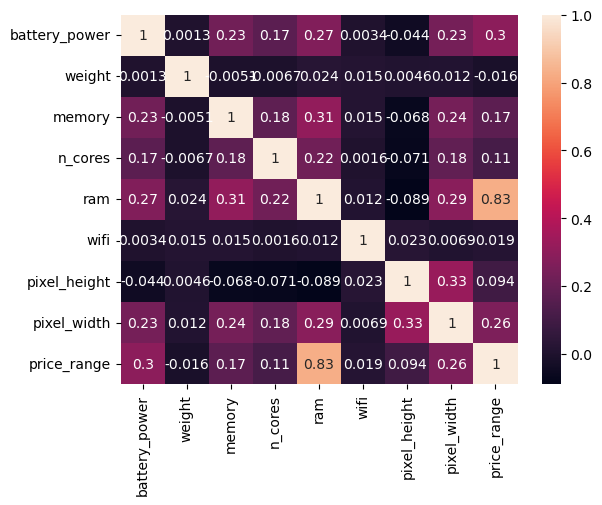

In [55]:
cor_coef = data.corr()
sns.heatmap(cor_coef, annot = True)

In [56]:
data['pixel_height'].replace(0, np.nan, inplace=True)

In [57]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4016.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,673.513695,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.047442,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,1.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,366.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [58]:
data.loc[data['pixel_height']<=200]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,NO,188,7,2.0,2549,0,1,20.0,756,1.0
11,1520,YES,177,33,8.0,3826,0,1,151.0,1005,3.0
28,1453,NO,96,52,2.0,2373,1,1,187.0,1311,2.0
32,1319,YES,107,41,1.0,2227,0,1,85.0,1152,1.0
33,1310,YES,100,51,4.0,3845,1,0,178.0,1919,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2971,1207,NO,141,56,6.0,2293,1,0,93.0,560,NaN
2978,1489,NO,197,60,7.0,677,1,1,7.0,719,NaN
2991,1797,YES,174,42,3.0,3359,0,1,57.0,1169,NaN
2998,1533,YES,171,50,2.0,2509,1,0,38.0,832,NaN


In [ ]:
#pixel_height values too low

In [59]:
data.loc[data.pixel_height.between(0, 200), 'pixel_height'] = np.nan

In [60]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3475.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,761.799424,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,360.960283,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,472.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,715.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1001.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [61]:
data['pixel_height'] = data['pixel_height'].fillna(data['pixel_height'].mean())

In [70]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,761.799424,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,335.594877,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,503.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,761.799424,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [73]:
data['bluetooth'].replace('YES', 1, inplace=True)

In [75]:
data['bluetooth'].replace('NO', 0, inplace=True)

In [79]:
data['dual_sim'].replace('YES', 1, inplace=True)
data['dual_sim'].replace('NO', 0, inplace=True)
data['dual_sim'] = data['dual_sim'].astype(int)

In [81]:
data.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.963930,1715.922637,0.507214,0.501990,761.799424,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220142,1184.300498,0.500010,0.500058,335.594877,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,503.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,761.799424,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [90]:
data.loc[data['ram']<25]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
3041,777,0,114,16,3.0,12,1,1,406.0,916,1.0
3065,800,0,124,7,4.0,6,0,0,784.0,515,1.0
3206,790,0,162,17,2.0,18,0,1,763.0,543,1.0
3234,804,0,137,15,2.0,22,0,0,670.0,338,1.0
3276,799,0,161,9,3.0,12,1,1,579.0,667,1.0
3306,806,0,107,13,4.0,8,1,1,938.0,959,1.0
3534,767,0,114,15,3.0,18,1,1,650.0,725,1.0
3593,756,0,161,16,2.0,18,0,1,979.0,780,1.0
3601,794,0,185,9,3.0,21,0,0,395.0,1150,1.0
3616,784,0,111,12,2.0,10,1,1,594.0,450,1.0


In [91]:
data.loc[data.ram.between(0, 25), 'ram'] = np.nan

In [92]:
data['ram'] = data['ram'].fillna(data['ram'].min())

In [93]:
data.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.963930,1715.973134,0.507214,0.501990,761.799424,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220142,1184.228118,0.500010,0.500058,335.594877,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,26.000000,0.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,503.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,761.799424,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [108]:
data1 = data.dropna()

In [127]:
import statsmodels.formula.api as sts

lin = sts.ols(formula = 'price_range ~ battery_power + bluetooth + weight + memory + n_cores + ram + dual_sim + wifi + pixel_height + pixel_width', data=data1).fit()

lin.params

Intercept        0.312760
battery_power    0.000197
bluetooth       -0.244589
weight          -0.001044
memory          -0.006841
n_cores         -0.043169
ram              0.000747
dual_sim        -0.019406
wifi            -0.007181
pixel_height     0.000423
pixel_width     -0.000109
dtype: float64

In [138]:
data2 = data.loc[data['price_range'].isnull()]
data3 = data2[['battery_power', 'bluetooth', 'weight', 'memory', 'n_cores', 'ram', 'dual_sim','wifi','pixel_height', 'pixel_width']]
#data4 = data2[['price_range']]

In [137]:
predictions = round(lin.predict(data3))
predictions

2000    2.0
2001    3.0
2002    2.0
2003    3.0
2004    1.0
       ... 
2995    1.0
2996    2.0
2997    1.0
2998    2.0
2999    2.0
Length: 1000, dtype: float64

In [140]:
#Log regression

In [146]:
X_train = data1[['battery_power', 'bluetooth', 'weight', 'memory', 'n_cores', 'ram', 'dual_sim','wifi','pixel_height', 'pixel_width']]
X_test = data3

In [147]:
Y_train = data1[['price_range']]

In [149]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, Y_train)

/Users/anastasiiaholovachova/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/anastasiiaholovachova/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [179]:
price_range_predicted = classifier.predict(X_test)

In [ ]:
#K-means

In [172]:
from sklearn.cluster import KMeans

In [173]:
import warnings
warnings.filterwarnings('ignore')

sse = [] 
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

In [174]:
sse

[5711957138.129131,
 2241325592.371747,
 1701046326.9604256,
 1449979576.4738736,
 1323893521.2289443,
 1216933261.762433,
 1122617291.8280013,
 1039340747.3735315,
 970371666.1100829,
 914710210.9805287,
 860505805.9143091,
 817683363.3374403,
 782636568.1508667,
 745878353.5802524]

In [175]:
cluster_df = pd.DataFrame({'Cluster':range(1,15), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,5.711957e+09
1,2,2.241326e+09
2,3,1.701046e+09
3,4,1.449980e+09
4,5,1.323894e+09


Text(0, 0.5, 'Squared error')

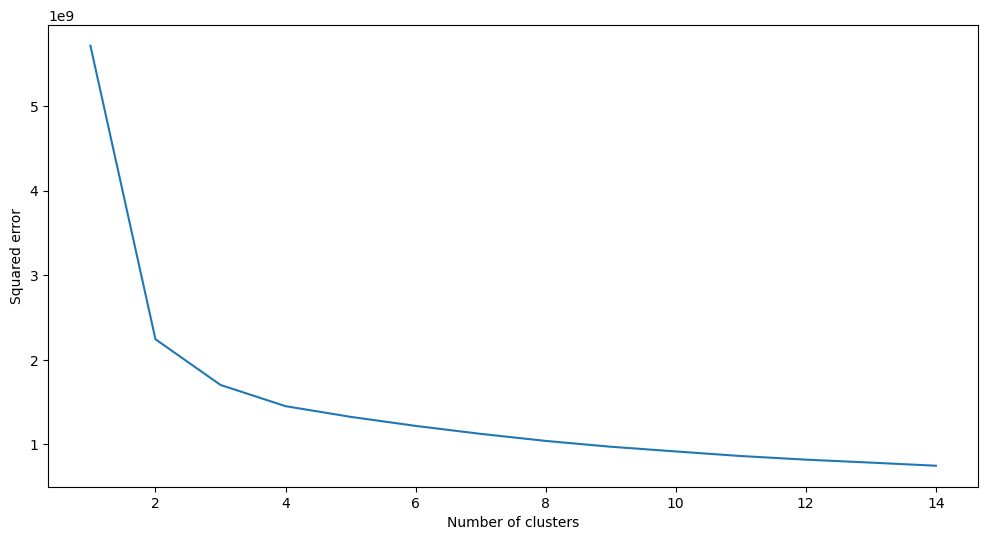

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Squared error')

In [182]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

KMeans(n_clusters=4)

In [183]:
cluster_suggested = kmeans.predict(X_test)
cluster_suggested

array([2, 2, 0, 2, 0, 2, 2, 3, 2, 3, 2, 2, 3, 3, 0, 3, 0, 0, 2, 0, 3, 2,
       3, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 3, 3, 2, 0, 2, 0, 3, 0, 1, 1,
       1, 3, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3, 0, 2, 2, 2, 1, 0, 3, 0,
       3, 2, 0, 3, 0, 0, 0, 2, 2, 1, 0, 3, 0, 2, 3, 2, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1, 2, 0, 0, 3, 3, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 0, 0, 0, 3, 2, 0, 2, 3, 1, 3,
       3, 0, 2, 3, 0, 3, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 3, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 3, 0, 3, 1, 0,
       3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 0,
       2, 2, 3, 0, 2, 2, 2, 3, 0, 3, 3, 1, 0, 0, 0, 0, 2, 2, 3, 0, 3, 2,
       0, 2, 2, 3, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 2, 3, 2, 1, 2, 0, 0, 1,
       3, 2, 3, 2, 0, 2, 3, 0, 2, 3, 1, 2, 2, 2, 0, 2, 0, 3, 2, 0, 0, 2,
       2, 2, 2, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 3, 1, 2, 0, 2,
       2, 0, 3, 2, 0, 0, 2, 0, 0, 3, 3, 1, 2, 2, 3,